In [41]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_train_data
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

In [2]:
# Load the data
data_path = os.path.join('data', 'meta.csv')
df = pd.read_csv(data_path)

print(df['Grid'].value_counts())

df = df[df.Grid == 1]
df = df[df.Season == 'Summer']
print(df.shape)
# Get random sample from train_data
df = df.sample(frac=5e-2)
print('Dataset size:', df.shape)

data, labels = load_train_data(df['Path'].values.tolist())
# data = data.reshape(data.shape[0], -1)
# labels = labels.reshape(labels.shape[0], -1)
print(data.shape, labels.shape)

Grid
1    880456
2    879374
Name: count, dtype: int64
(240826, 19)
Dataset size: (12041, 19)
(12041, 120, 120, 3) (12041, 120, 120)


In [25]:
# Load classes.csv
# classes_path = os.path.join('classes.csv')
classes_df = pd.read_csv('data/classes.csv', sep='\t')
print(classes_df.head(20))
print(classes_df.columns)
print(classes_df.shape)

    ID                                       Class
0    1                     Continuous urban fabric
1    2                  Discontinuous urban fabric
2    3              Industrial or commercial units
3    4  Road and rail networks and associated land
4    5                                  Port areas
5    6                                    Airports
6    7                    Mineral extraction sites
7    8                                  Dump sites
8    9                          Construction sites
9   10                           Green urban areas
10  11                Sport and leisure facilities
11  12                   Non-irrigated arable land
12  13                                   Vineyards
13  14           Fruit trees and berry plantations
14  15                                    Pastures
15  16                         Broad-leaved forest
16  17                           Coniferous forest
17  18                                Mixed forest
18  19                         

In [44]:
# Define a color name available in matplotlib to each of 33 classes
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan',
 'black', 'yellow', 'magenta', 'lime', 'teal', 'indigo', 'maroon', 'navy', 'peru', 'gold',
 'darkorange', 'darkgreen', 'darkred', 'darkblue', 'darkmagenta', 'darkcyan', 'darkgray',
 'darkolivegreen', 'cyan', 'darkslategray', 'darkgoldenrod', 'darkseagreen', 'darkslateblue']

# print(colors)
classes_df['Color'] = colors
print(classes_df.head(35))


    ID                                       Class           Color
0    1                     Continuous urban fabric             red
1    2                  Discontinuous urban fabric            blue
2    3              Industrial or commercial units           green
3    4  Road and rail networks and associated land          purple
4    5                                  Port areas          orange
5    6                                    Airports           brown
6    7                    Mineral extraction sites            pink
7    8                                  Dump sites            gray
8    9                          Construction sites           olive
9   10                           Green urban areas            cyan
10  11                Sport and leisure facilities           black
11  12                   Non-irrigated arable land          yellow
12  13                                   Vineyards         magenta
13  14           Fruit trees and berry plantations            

In [6]:
def normalize_to_255(image):
    normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (normalized * 255).astype(np.uint8)

Image: 0 - Present labels: [['Road and rail networks and associated land' 'purple']
 ['Port areas' 'orange']
 ['Fruit trees and berry plantations' 'lime']
 ['Coniferous forest' 'maroon']
 ['Mixed forest' 'navy']
 ['Natural grasslands' 'peru']] 

Image: 1 - Present labels: [['Sport and leisure facilities' 'black']
 ['Fruit trees and berry plantations' 'lime']
 ['Coniferous forest' 'maroon']
 ['Natural grasslands' 'peru']
 ['Moors and heathland' 'gold']
 ['Bare rock' 'darkred']
 ['Estuaries' 'darkseagreen']] 

Image: 2 - Present labels: [['Fruit trees and berry plantations' 'lime']
 ['Mixed forest' 'navy']
 ['Natural grasslands' 'peru']
 ['Moors and heathland' 'gold']] 



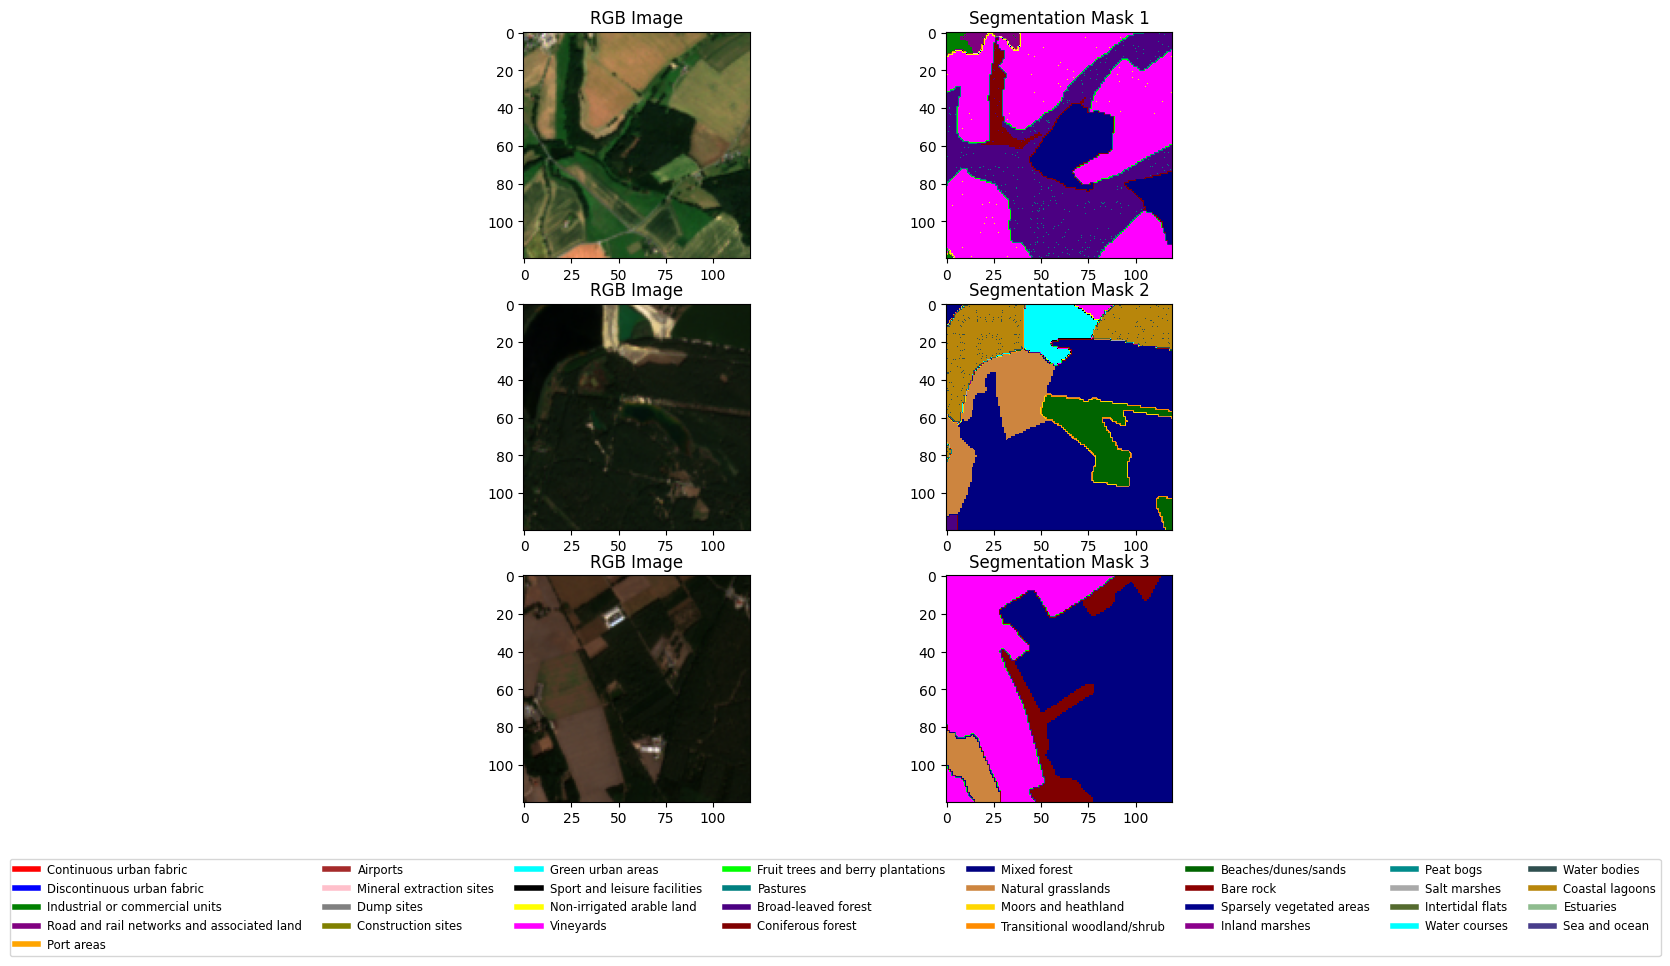

In [49]:
# Plot 3 rgb image and segmentation labels side by side
sample_size = 3
# Obtenha índices aleatórios
indices = np.random.choice(data.shape[0], sample_size, replace=False)
# Extraia a amostra dos arrays
sampled_data = data[indices]
sampled_labels = labels[indices]
fig, axs = plt.subplots(sample_size, 2, figsize=(10, 10))
# Convert class colors to a colormap
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors) + 1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

for i in range(sample_size):
    # Index goes from 0 - 32 and labels go from 1 - 33
    present_indexes = np.unique(sampled_labels[i]) + 1
    present_labels = classes_df.loc[present_indexes, ['Class', 'Color']].values
    print(f'Image: {i} - Present labels: {present_labels} \n')
    
    axs[i, 0].imshow(normalize_to_255(sampled_data[i]))
    axs[i, 0].set_title('RGB Image')
    
    axs[i, 1].imshow(sampled_labels[i], cmap=cmap, norm=norm)
    axs[i, 1].set_title(f"Segmentation Mask {i+1}")

# legend_elements = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=f'{classes_df.loc[i, 'Class']}') for i in range(len(colors))]
legend_elements = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=f"{classes_df.loc[i, 'Class']}") for i in range(len(colors))]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=8, fontsize='small')
plt.show()